In [21]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from scipy.special import expit

In [3]:
x, y = make_classification(
    n_samples = 100,
    n_features = 1,
    n_classes = 2,
    n_clusters_per_class = 1,
    flip_y = 0.03,
    n_informative = 1,
    n_redundant = 0,
    n_repeated = 0
)

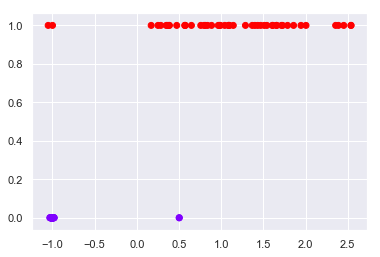

In [6]:
plt.scatter(x, y, c=y, cmap="rainbow")

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [12]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print(lr.coef_)


[[2.78502307]]


In [16]:
print(lr.intercept_)

[0.16433588]


In [17]:
y_pred = lr.predict(x_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[10,  1],
       [ 1, 13]])

In [19]:
lr.predict_proba(x_test)

array([[0.00119677, 0.99880323],
       [0.93387884, 0.06612116],
       [0.93468449, 0.06531551],
       [0.08093716, 0.91906284],
       [0.9328655 , 0.0671345 ],
       [0.9318663 , 0.0681337 ],
       [0.00834785, 0.99165215],
       [0.00374661, 0.99625339],
       [0.05090443, 0.94909557],
       [0.93251251, 0.06748749],
       [0.03956099, 0.96043901],
       [0.0083406 , 0.9916594 ],
       [0.27746095, 0.72253905],
       [0.93314788, 0.06685212],
       [0.00582409, 0.99417591],
       [0.93389897, 0.06610103],
       [0.01546161, 0.98453839],
       [0.01145016, 0.98854984],
       [0.93488364, 0.06511636],
       [0.00942615, 0.99057385],
       [0.17258112, 0.82741888],
       [0.34523922, 0.65476078],
       [0.93186876, 0.06813124],
       [0.93113709, 0.06886291],
       [0.93421436, 0.06578564]])

In [20]:
df = pd.DataFrame({"x": x_test[:, 0], "y": y_test})
df = df.sort_values(by = "x")

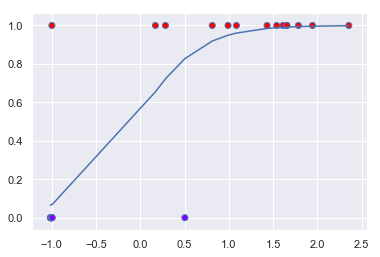

In [22]:
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')